In [1]:
from datascience import *
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# 1. The Data Science Life Cycle  

In Notebooks 1-4, we got a taste of how to use the Jupyter notebook environment and the Python programming language to derive basic insights about some dataset of interest. We also got an introduction to histograms, scatter plots, bar plots, line plots, and the word cloud. More importantly, we identified when and why we can use a specific visualization.  

In the grand scheme of things, however, data visualization and analysis *tend* to be the *final* steps in the **data science lifecycle**. Below, we can see the depiction of the Data Science Life Cycle as envisioned by the course [Data 100](https://ds100.org/sp22/).


![](lifecycle.png)
*Need to add citation*

1. **Question/Problem Formulation:** 
    - What do we want to know or what problems are we trying to solve?
    - What are our hypotheses?
    - What are our metrics of success?


2. **Data Acquisition and Cleaning:**
    - What data do we have and what data do we need?
    - How will we collect more data?
    - How do we organize the data for analysis?


3. **Exploratory Data Analysis:**
    - Do we already have relevant data?
    - What are the biases, anomalies, or other issues with the data?
    - How do we transform the data to enable effective analysis?


4. **Prediction and Inference:**
    - What does the data say about the world?
    - Does it answer our questions or accurately solve the problem?
    - How robust are our conclusions? 
    
*Need to add citation*
    
    
This is the life cycle that you will go through for your final project. You have already started thinking through a possible question/problem formulation when we asked you to think about a topic and concepts. Then, after that, we asked you to find some example datasets regarding that topic. This is the start of the (2) Data acquisition process. At this point in the course, you might be narrowing down on what dataset you'd like to explore. 

# 2. Data Cleaning 

Now, imagine you have decided what your dataset will be. 

In [2]:
data = Table.read_table("../data/nb5/17010_4_P_970_1.csv")
data.show(2)

geoid,name,year,total_est,total_se,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,black_se,hisp_est,hisp_se,nhisp_est,nhisp_se,nhopi_est,nhopi_se,nhwhite_est,nhwhite_se,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
97000US0100007,"Hoover City School District, Alabama",2009,14.1384,7.22053,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14.8973,10.7848,13.1185,22.5664,nan,nan,nan,nan,nan,nan,14.8973,10.7848
97000US0100007,"Hoover City School District, Alabama",2010,24.9359,15.5228,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [3]:
dictionary = Table.read_table("../data/nb5/data_dictionary.csv")
dictionary.show(10)

Column,Type,Label,Description
geoid,text,Census Geographic Identifier,nan
name,text,Census Geography Name,nan
year,text,Year,nan
total_est,numeric,Estimate; Total,The ACS-based estimate for the Total population.
total_se,numeric,Standard Error; Total,The standard error of the ACS-based estimate for the Tot ...
aian_est,numeric,Estimate; American Indian and Alaska Native Alone,The ACS-based estimate for the American Indian and Alask ...
aian_se,numeric,Standard Error; American Indian and Alaska Native Alone,The standard error of the ACS-based estimate for the Ame ...
api_est,numeric,Estimate; Asian or Pacific Islander Alone,The ACS-based estimate for the Asian or Pacific Islander ...
api_se,numeric,Standard Error; Asian or Pacific Islander Alone,The standard error of the ACS-based estimate for the Asi ...
asian_est,numeric,Estimate; Asian Alone,The ACS-based estimate for the Asian Alone population.


# `NaN` and Missing Values 

Show students how to deal with NaN values. First, show them a histogram of a column with NaN values. 

- Experiment with removing the NaN values and document how the size of our dataset changed
    - Need to figure out how to remove NaN values with `datascience` library
    - Plot histogram of new data without NaN values
- Experiment filling out NaN values with 0 
    - Talk about what implications this will have on our data and future analysis 
    - Plot histogram of new data with NaN = 0 

---

## Removing NaN values

In [4]:
import pandas as pd

### Histogram before removing NaN values

Histogram for the estimate for American Indian and Alaska Native Alone population before removing NaN values:

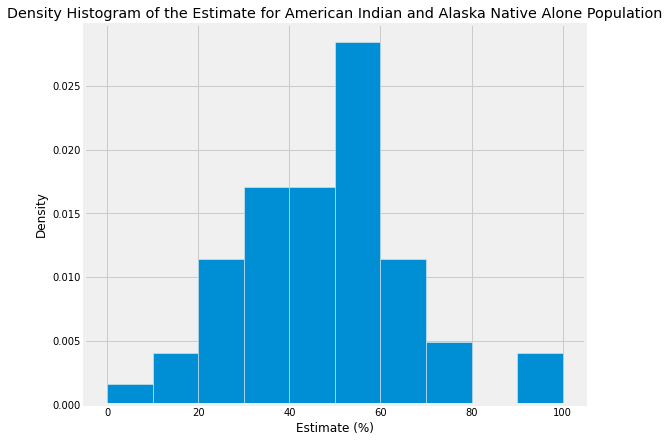

In [5]:
plt.figure(figsize = (8, 7))
plt.hist(data = data, x = "aian_est", density = True)
plt.title("Density Histogram of the Estimate for American Indian and Alaska Native Alone Population")
plt.xlabel("Estimate (%)")
plt.ylabel("Density")
plt.show()

### Counting non-NaN rows

Function to count the number of rows with no NaN values:

In [6]:
def nan_count(tbl):
    counter = 0
    for x in np.arange(tbl.num_rows):
        list_row = list(tbl.row(x))
        if np.count_nonzero(pd.isna(list_row)) > 0:
            counter = counter + 1
    return counter

Number of rows with no NaN values:

In [7]:
data.num_rows - nan_count(data)

7

### Removing NaN rows

Function to remove rows with at least 1 NaN value:

(We don't remove columns as we would lose data about important variables)

In [13]:
def remove_nan(tbl):
    tbl_new = Table(tbl.labels)
    for x in np.arange(tbl.num_rows):
        list_row = list(tbl.row(x))
        if np.count_nonzero(pd.isna(list_row)) == 0:
            tbl_new = tbl_new.with_rows([list_row])
    return tbl_new

Cleaned table with no rows with NaN values:

In [14]:
no_nan_data = remove_nan(data)
no_nan_data.show(2)

geoid,name,year,total_est,total_se,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,black_se,hisp_est,hisp_se,nhisp_est,nhisp_se,nhopi_est,nhopi_se,nhwhite_est,nhwhite_se,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
97000US0622710,"Los Angeles Unified School District, California",2009,42.236,1.10214,47.0345,24.5447,19.4306,3.94037,18.1517,3.92655,39.1309,2.96612,47.7267,1.30225,33.6039,4.26988,35.312,19.7135,30.9365,3.28564,43.8647,1.25148,49.6292,2.18227,48.3904,2.11697,26.0298,7.99691,41.6519,1.48596
97000US0622710,"Los Angeles Unified School District, California",2010,41.5606,1.268,57.3333,16.8137,27.8755,5.46234,26.9609,5.66281,41.3333,1.93264,45.5406,1.73719,34.5739,5.18632,43.7333,16.1382,25.5798,3.19571,43.6119,1.38337,49.7145,2.91172,48.5096,2.76949,34.5604,8.32421,37.0962,1.73551


The table shrunk from 7520 rows to only 7 rows

### Histogram after removing NaN values

In [17]:
no_nan_data['aian_est']

array([47.034485, 57.333332, 71.650719, 56.151833, 71.333328, 26.751593,
       98.529411])

Histogram for the estimate for American Indian and Alaska Native Alone population after removing NaN values:

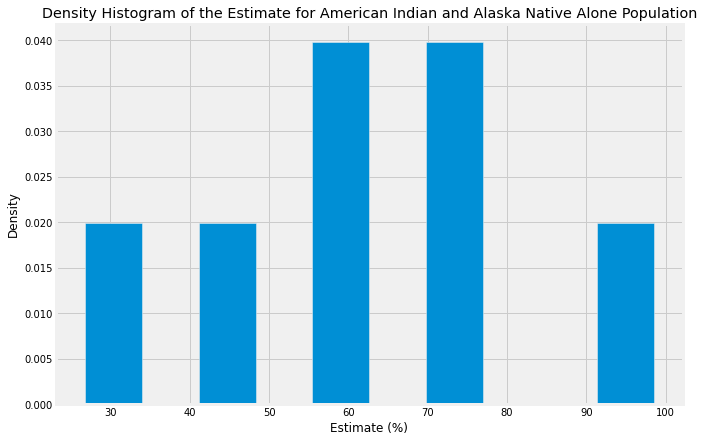

In [10]:
plt.figure(figsize = (10, 7))
plt.hist(data = no_nan_data, x = "aian_est", density = True)
plt.title("Density Histogram of the Estimate for American Indian and Alaska Native Alone Population")
plt.xlabel("Estimate (%)")
plt.ylabel("Density")
plt.show()